The intention of this notebook is to make a Stochastic gradient descent classifier model capable of classifying the genre of a song, the model will be trained with a dataset from spotify

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

In [3]:
from google.colab import files

In [4]:
uploaded = files.upload()

Saving genres_v2.csv to genres_v2.csv


In [5]:
df = pd.read_csv('genres_v2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

We can see the different features that spotify uses, let's clean the data

In [7]:
df['type']

0        audio_features
1        audio_features
2        audio_features
3        audio_features
4        audio_features
              ...      
42300    audio_features
42301    audio_features
42302    audio_features
42303    audio_features
42304    audio_features
Name: type, Length: 42305, dtype: object

The dataframe cointains 8 columns that dont add any representarivity, and by observing the unnamed column, we can drop it with confidence

In [8]:
df = df.drop(['uri', 'track_href', 'analysis_url','song_name', 'Unnamed: 0','title','type','id'],axis=1)

In [10]:
df.groupby('genre').count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
Emo,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680
Hiphop,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028,3028
Pop,461,461,461,461,461,461,461,461,461,461,461,461,461
Rap,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848
RnB,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099,2099
Trap Metal,1956,1956,1956,1956,1956,1956,1956,1956,1956,1956,1956,1956,1956
Underground Rap,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875,5875
dnb,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966,2966


Since the dataset is not proportional between all the possible classes, the train_test_split should be splitted

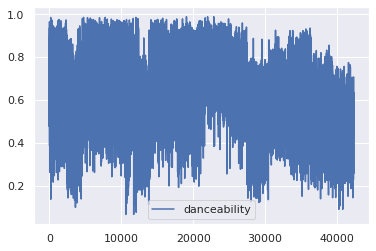

In [18]:
df[['genre','danceability']].plot()

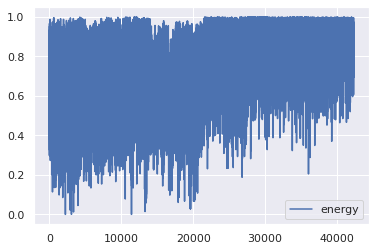

In [19]:
df[['energy','genre']].plot()

These features have no aparent correlation, let's check if speechiness and instrumentalness are inversely correlated

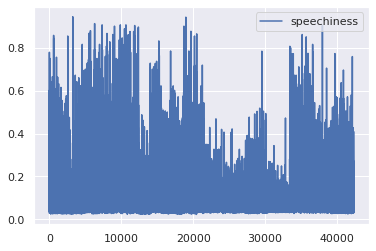

In [20]:
df[['genre','speechiness']].plot()

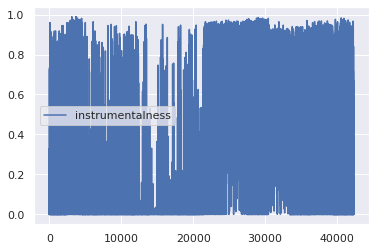

In [21]:
df[['genre','instrumentalness']].plot()

Even the most logical features to be correlated are not, for the rest of the notebook, the assumption of no correlation between the features is assumed

In [22]:
X = df.drop('genre',axis=1).values
y = df['genre']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

In [178]:
 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, stratify=y)

In [217]:
params = {'gb__n_estimators':[50, 100, 200],
          'gb__learning_rate':np.arange(0.1,1.01,.3),'gb__max_features':['sqrt', 'log2']}

In [218]:
pipe = Pipeline([('scaler',StandardScaler()),('gb',GradientBoostingClassifier())])

In [223]:
kf = StratifiedKFold(n_splits=10,shuffle=True)

In [220]:
csv = GridSearchCV(pipe,param_grid=params,cv=kf, n_jobs=-1,verbose=10)

In [222]:
csv.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


KeyboardInterrupt: ignored

In [141]:
predictions = csv.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score, f1_score

In [142]:
accuracy_score(predictions, y_test)

0.688622754491018

In [163]:
f1_score(predictions, y_test, average='weighted')

0.6951629122644976

The models predicts better than a random chooser, using xgboost could improve our classification 

In [164]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
import xgboost as xgb

In [176]:
type(y_test)

pandas.core.series.Series

In [224]:
params = {'xgb__lambda':[.1,1,10],'xgb__alpha':[.0001,.01,],'xgb__eta':[.3,.6],'xgb__gamma':[.00001 ,.001] }

In [225]:
pipe = Pipeline([('scaler',StandardScaler()),('xgb',xgb.XGBClassifier())])

In [226]:
csv = GridSearchCV(pipe,param_grid=params,cv=kf, n_jobs=-1,verbose=10)

In [227]:
csv.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb', XGBClassifier())]),
             n_jobs=-1,
             param_grid={'xgb__alpha': [0.0001, 0.01], 'xgb__eta': [0.3, 0.6],
                         'xgb__gamma': [1e-05, 0.001],
                         'xgb__lambda': [0.1, 1, 10]},
             verbose=10)

In [228]:
predictions = csv.predict(X_test)

In [230]:
accuracy_score(predictions, y_test)

0.6849196344153797

In [209]:
csv.best_params_

{'xgb__alpha': 0.0001,
 'xgb__eta': 0.3,
 'xgb__gamma': 1e-05,
 'xgb__lambda': 0.1}

In [213]:
pipe = Pipeline([('scaler',StandardScaler()),('xgb',xgb.XGBClassifier(reg_alpha=.0001, eta=.3, gamma=1e-05,reg_lambda=.1))])

In [215]:
kf = StratifiedKFold(n_splits=10,shuffle=True)

In [216]:
from sklearn.model_selection import cross_val_score

In [233]:
cross_val_score(pipe, X_test, y_test, cv=kf).mean()

array([0.67480315, 0.66535433, 0.68951931, 0.65169425, 0.66903073,
       0.69503546, 0.68321513, 0.66587864, 0.67927502, 0.6713948 ])

In [234]:
np.array([0.67480315, 0.66535433, 0.68951931, 0.65169425, 0.66903073,
       0.69503546, 0.68321513, 0.66587864, 0.67927502, 0.6713948 ]).mean()

0.6745200820000001

The improvements were marginal, nonetheless the data was extremely erratic, with very correlation between the features, but the model was able to have an accuracy of .69 and an f1 score of .69, 